# Data Wrangling, EDA, and Visualization (66 points)

We are going to investigate the TaFeng Transactions to another level.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy, Datascience, pandas modules.
import numpy as np
import pandas as pd
import seaborn as sns

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Importing Data
Please copy necessary codes from workshop 3 to import the three tables and conduct the same LEFT join to get the tafeng_full dataframe.

In [2]:
age_class_columns = ['code', 'age_range']
age_classes = pd.read_csv('age_classes.txt', sep=" ",  
                          header=None, names=age_class_columns)

# age_classes

In [3]:
residence_areas = pd.read_csv('residence_area.txt', 
                              delimiter=':',
                              header=None, 
                              names=['code','area'])

residence_areas['area'] = residence_areas['area'].str.strip()

# residence_areas

In [4]:
tafeng_transactions = pd.read_csv('TaFengTransactions.txt', delimiter=';')

# remove potential leading or trailing whitespace
tafeng_transactions['age_code'] = tafeng_transactions['age_code'].str.strip()
tafeng_transactions['residence_area'] = tafeng_transactions['residence_area'].str.strip()

# tafeng_transactions.head()

In [5]:
tafeng_full = pd.merge(tafeng_transactions, age_classes,
                      how='left', left_on='age_code', right_on='code')
tafeng_full = tafeng_full.drop('code', axis=1)

tafeng_full = pd.merge(tafeng_full, residence_areas, 
                      how='left', left_on = 'residence_area', right_on = 'code') 
tafeng_full = tafeng_full.drop('code', axis=1)

In [20]:
#Copy the code here
tafeng_full.head() # output 1 point

,entry_date,transaction_time,customer_id,age_code,residence_area,product_subclass,product_id,amount,asset,sales_price,age_range,area
0,2016-12-26,2001-01-15 00:00:00,1786439,G,H,110109,4710043552065,1,144,190,50-54,unknown
1,2016-12-26,2001-01-15 00:00:00,98946,E,E,100312,4710543111014,1,32,38,40-44,115
2,2016-12-26,2001-01-15 00:00:00,905602,D,E,500206,4710114322115,1,64,79,35-39,115
3,2016-12-26,2001-01-15 00:00:00,1964295,E,E,530106,4713813010123,1,174,147,40-44,115
4,2016-12-26,2001-01-15 00:00:00,2146553,B,D,100217,8801019421013,1,47,52,25-29,114


# Question 1 (24 points)
Create a data frame called "carts" that contains the three variables above, as well as "customer_id" and "transaction_time". Make sure you use the names specified. (8 points)

In [74]:
num_items = tafeng_full.groupby(['transaction_time', 'customer_id'])['amount'].sum()
# num_items.columns = ['transaction_time', 'customer_id', 'num_items']
num_items.head()

transaction_time     customer_id
2000-11-01 00:00:00  45957          1
                     164252         1
                     217361         1
                     916264         2
                     955188         2
Name: amount, dtype: int64

In [103]:
tafeng_full['total'] = tafeng_full['amount'] * tafeng_full['sales_price']
tafeng_full.head()

,entry_date,transaction_time,customer_id,age_code,residence_area,product_subclass,product_id,amount,asset,sales_price,age_range,area,total
0,2016-12-26,2001-01-15 00:00:00,1786439,G,H,110109,4710043552065,1,144,190,50-54,unknown,190
1,2016-12-26,2001-01-15 00:00:00,98946,E,E,100312,4710543111014,1,32,38,40-44,115,38
2,2016-12-26,2001-01-15 00:00:00,905602,D,E,500206,4710114322115,1,64,79,35-39,115,79
3,2016-12-26,2001-01-15 00:00:00,1964295,E,E,530106,4713813010123,1,174,147,40-44,115,147
4,2016-12-26,2001-01-15 00:00:00,2146553,B,D,100217,8801019421013,1,47,52,25-29,114,52


In [104]:
total_value = tafeng_full.groupby(['transaction_time', 'customer_id'])['total'].sum()

# total_value.columns = ['transaction_time', 'customer_id', 'total_value']
total_value.head()

transaction_time     customer_id
2000-11-01 00:00:00  45957          133
                     164252          89
                     217361          65
                     916264          96
                     955188          96
Name: total, dtype: int64

In [105]:
num_unique = tafeng_full.groupby(['transaction_time', 'customer_id'])['product_id'].nunique()
# num_unique.columns = ['transaction_time', 'customer_id', 'num_unique']
num_unique.head()

transaction_time     customer_id
2000-11-01 00:00:00  45957          1
                     164252         1
                     217361         1
                     916264         1
                     955188         1
Name: product_id, dtype: int64

In [106]:
carts = pd.merge(pd.merge(num_items, total_value, how='outer', on=['transaction_time', 'customer_id']), num_unique, how='outer', on=['transaction_time', 'customer_id'])
carts.rename(columns={'amount':'num_items', 'total':'total_value', 'product_id':'num_unique'}, inplace=True)

carts # output 1 point

num_items  total_value  num_unique
transaction_time    customer_id                                    
2000-11-01 00:00:00 45957                1          133           1
                    164252               1           89           1
                    217361               1           65           1
                    916264               2           96           1
                    955188               2           96           1
                    1327205              1          102           1
                    1790184              1           75           1
                    1846225              1           28           1
                    1846546              1           19           1
                    2004402              1           10           1
                    2034638              2           76           1
                    2116334              1           55           1
2000-11-02 00:00:00 26550                1           75           1
                    29421                2           34           1
                    48590                1           40           1
                    88541                3          531           1
                    91343                1          159           1
                    161084               2          272           1
                    256735               1           70           1
                    281799               1           89           1
                    308472               1           86           1
                    334563               1           25           1
                    375917               2          164           2
                    380300               1          143           1
                    426282               2           76           1
                    445467               1           74           1
                    446082               2           76           1
                    556446               1           89           1
                    593625               1           25           1
                    666244               1          115           1
...                                    ...          ...         ...
2001-01-31 00:00:00 1385878              1           33           1
                    1467727              1          115           1
                    1515626              1           26           1
                    1518467              1           35           1
                    1561524              2          272           1
                    1596878              1           99           1
                    1625660              1           15           1
                    1646313              1           95           1
                    1732344              1           99           1
                    1746846              2          436           1
                    1813319              1           30           1
                    1838206              1           19           1
                    1846416              1          359           1
                    1848410              1           18           1
                    1854107              1          148           1
                    1856088              1           22           1
                    1869798              1           36           1
                    1881127              1           85           1
                    1926460              3          333           1
                    1978414              1          109           1
                    2035277              2          156           1
                    2037820              1         1395           1
                    2038797              2          112           1
                    2110790              2          136           2
                    2124032              1           55           1
                    2135250              1          342           1
                    2

Now let's take a look at the relationship between the number of items in a cart and the cart's total value. Intuitively the two should be positively correlated. Make a SCATTER plot that will help us inspect the relationship between these two variables. (6 points) 

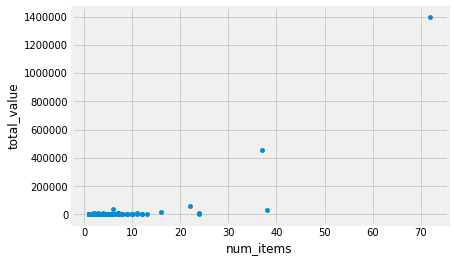

In [107]:
sp1 = carts.plot.scatter(x='num_items', y='total_value')
# plot output 1 point

We might expect from the distribution of the number of trips that there would be a few very large values for the number of items and the total amount spent. Indeed, a handful of observations make it difficult to see the shape of the bulk of the data. Take a log transformation of these two variables. Make another scatter plot, but this time, log-transform both the x and y axes. (2 points)

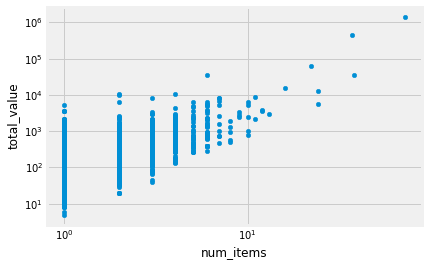

In [108]:
sp2 = carts.plot.scatter(x='num_items', y='total_value')
sp2.set_yscale('log')
sp2.set_xscale('log')
# plot output 1 point

Please study the functionality of seaborn's lmplot and use it to simultaneously plot the points and the line-of-best-fit for the log-log data. (2 points)

In [110]:
carts['log_num_items'] = np.log(carts['num_items'])
carts['log_total_value'] = np.log(carts['total_value'])
carts.head()

num_items  total_value  num_unique  \
transaction_time    customer_id                                       
2000-11-01 00:00:00 45957                1          133           1   
                    164252               1           89           1   
                    217361               1           65           1   
                    916264               2           96           1   
                    955188               2           96           1   

                                 log_num_items  log_total_value  
transaction_time    customer_id                                  
2000-11-01 00:00:00 45957             0.000000         4.890349  
                    164252            0.000000         4.488636  
                    217361            0.000000         4.174387  
                    916264            0.693147         4.564348  
                    955188            0.693147         4.564348

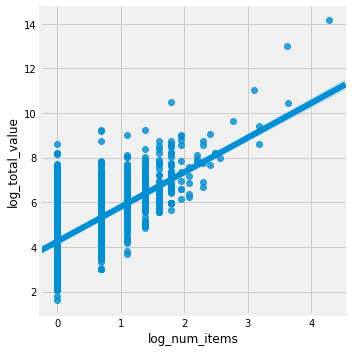

In [114]:
combPlt1 = sns.lmplot('log_num_items', 'log_total_value', data=carts)
# plot output 1 point

# Self-Directed EDA
This last two questions are intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them. Be sure to consider NECESSARY transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit to reveal the relationship that you are wanting to learn more about. Also be sure to make plots that are appropriate for the variable types. For completeness, be explicit about any assumptions you make in your analysis.

# Question 2 (14 points)
Make a visualization of and interpret the age distribution of the shoppers. (10 points)

In [ ]:
... #replace ... with your code and an output plot deserves 1 point

# Question 3 (26 points)
Make a visualization of and interpret the relationship between amount spent on a shopping trip and the customer's age. (20 points)

In [ ]:
... #replace ... with your code and an output plot deserves 1 point

In [ ]:
Your observations? (5 points) - 